In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


___
##DFS
###Tempo médio variando i

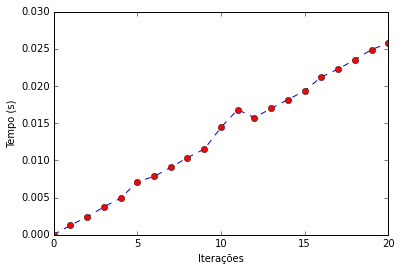

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from solver import Solver


def dfs():
    solver = Solver()
    result = []
    for i in range(21):
        t = []
        # Gets 100 samples
        for j in range(100):
            start = time.clock()
            v = solver.dfs(i*10)
            t.append(time.clock() - start)
        # Calculates the median time
        result.append(np.median(t))

    # Returns a list of medians
    return result


x = dfs()
plt.plot(x,'b--', x,'ro')
plt.xlabel(u"Iterações")
plt.ylabel(u"Tempo (s)")
plt.show()

### Consegue ir até o 2ˆ20?

In [ ]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from solver import Solver


def dfs():
    solver = Solver(3) 
    result = []
    for i in range(8):
        t = []
        # Gets 100 samples
        for j in range(10):
            start = time.clock()
            v = solver.dfs(math.pow(2, i))
            t.append(time.clock() - start)
        # Calculates the median time
        result.append(np.median(t))

    # Returns a list of medians
    return result


x = dfs()
plt.plot(x,'b--', x,'ro')
plt.xlabel(u"Iterações")
plt.ylabel(u"Tempo (s)")
plt.show()

___
##Algoritmo
###Tempo médio variando i

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from solver import Solver
from cube import rubiks_cube

TIME_LIMIT = 3  # 3 minutes

def dfs_bfs():
    solver = Solver(3)
    result = [[], []] # Keeps the execution time + path length
    bfs_target = rubiks_cube()
    for i in range(9):
        print "i = ", i
        start_i = time.clock()
        t = []
        l = []
        for j in range(100):
            start = time.clock()
            v = solver.dfs(i)
            u = solver.bfs(v, bfs_target)
            p = solver.calculate_shortest_path(u) # Path from v to cube's initial state
            t.append(time.clock() - start)
            l.append(len(p))
        result[0].append(np.median(t))
        result[1].append(np.median(l))
        print "Tempo em minutos", (time.clock() - start_i)/60
    return result

result_1 = dfs_bfs()
plt.figure(1)
# To plot the i X time
plt.plot(result_1[0],'b--', result_1[0],'ro')
plt.xlabel(u"Valor de i")
plt.ylabel(u"Tempo (s)")

# To plot the i X length
plt.figure(2)
plt.plot(result_1[1],'b--', result_1[1],'ro')
plt.xlabel(u"Tamanho do caminho")
plt.ylabel(u"Tempo (s)")
plt.show()

i =  0
Tempo em minutos 6.98333333335e-06
i =  1
Tempo em minutos 5.15000000002e-06
i =  2
Tempo em minutos 4.365e-05
i =  3
Tempo em minutos 0.000336283333333
i =  4
Tempo em minutos 5.225e-05
i =  5
Tempo em minutos 0.0005085
i =  6
Tempo em minutos 0.168744533333
i =  7


KeyboardInterrupt: 

###Tempo médio variando 2ˆi

In [ ]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from solver import Solver
from cube import rubiks_cube

TIME_LIMIT = 3  # 3 minutes

def dfs_bfs():
    solver = Solver()
    result = [[], []] # Keeps the execution time + path length
    bfs_target = rubiks_cube()
    for i in range(0, 4):
        t = []
        l = []
        for j in range(100):
            start = time.clock()
            v = solver.dfs(math.pow(2, i))
            u = solver.bfs(v, bfs_target, TIME_LIMIT)
            p = solver.calculate_shortest_path(u) # Path from v to cube's initial state
            t.append(time.clock() - start)
            l.append(len(p))
        result[0].append(np.median(t))
        result[1].append(np.median(l))
    return result

result = dfs_bfs()

plt.figure(1)
# To plot the i X time
plt.plot(result[0],'b--', result[0],'ro')
plt.xlabel(u"Valor de i")
plt.ylabel(u"Tempo (s)")

# To plot the i X length
plt.figure(2)
plt.plot(result[1],'b--', result[1],'ro')
plt.xlabel(u"Tamanho do caminho")
plt.ylabel(u"Tempo (s)")
plt.show()